In [7]:
#page 54 , multiple and multivariate liner regression using Tensorflow
import pandas as pd
column_names = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin']
data = pd.read_csv('data/auto+mpg/auto-mpg.data',names=column_names,na_values='?',comment='\t',sep=' ',skipinitialspace=True)

In [12]:
data

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     model_year  
0            70  
1            70  
2            70  
3            70  
4            70  
..          ...  
393          82  
394          82  
395          82  
396          82  
397          82  

[392 rows x 7 columns]

In [11]:
data = data.drop('origin',axis=1)
print(data.isna().sum())
data = data.dropna()


mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
dtype: int64


In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.layers import Dense , normalization
import seaborn as sns

C:\Users\vivek\anaconda3\envs\tensorFlowEnv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


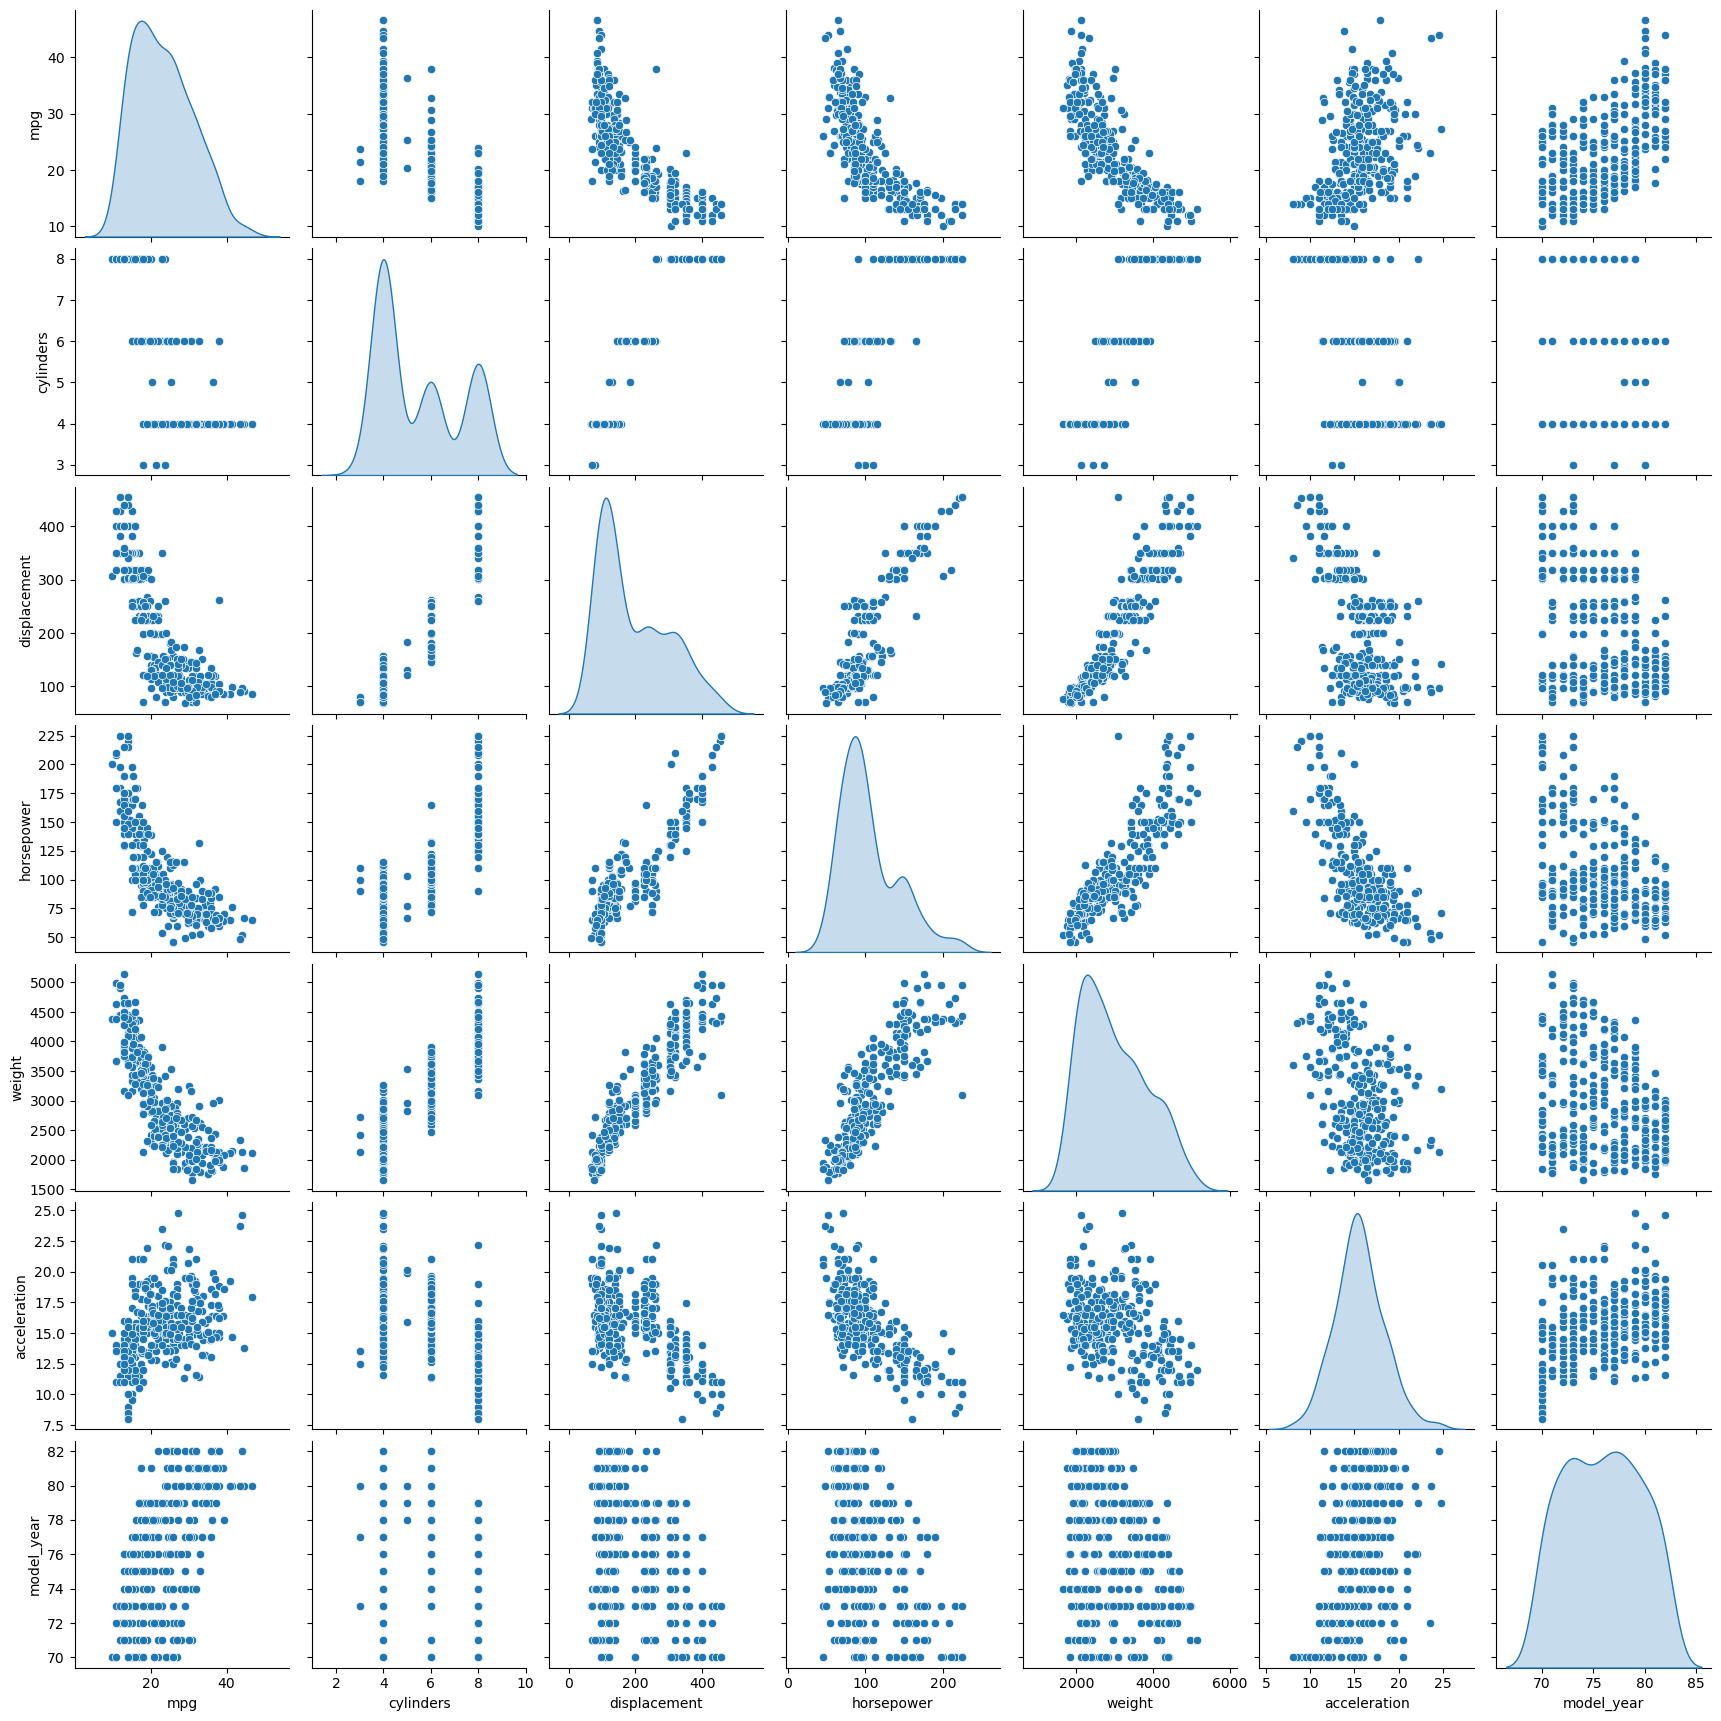

In [14]:
train_dataset = data.sample(frac=0.8,random_state=0)
test_dataset = data.drop(train_dataset.index)

sns.pairplot(train_dataset[['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year']],diag_kind='kde')

Epoch 1/100
8/8 [==============================] - 1s 20ms/step - loss: 596.8634 - val_loss: 610.8835
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 578.2767 - val_loss: 590.6136
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 558.9282 - val_loss: 568.4352
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 537.0614 - val_loss: 541.8204
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 510.7098 - val_loss: 509.5487
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 478.3086 - val_loss: 469.8805
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 438.6220 - val_loss: 421.0074
Epoch 8/100
8/8 [==============================] - 0s 6ms/step - loss: 389.7940 - val_loss: 363.6985
Epoch 9/100
8/8 [==============================] - 0s 5ms/step - loss: 332.3045 - val_loss: 299.9111
Epoch 10/100
8/8 [==============================] - 0s 5ms/step - loss: 270.0960 - val_los

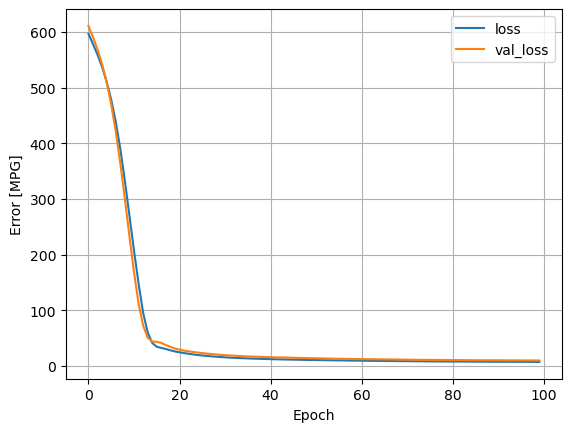

In [16]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('mpg')
test_labels = test_features.pop('mpg')

data_normalizer = tf.keras.layers.Normalization(axis=1)
data_normalizer.adapt(np.array(train_features))

model = tf.keras.models.Sequential([data_normalizer,Dense(64,activation='relu'),Dense(64,activation='relu'),Dense(1,activation=None)])


model.compile(optimizer=tf.keras.optimizers.Adam(),loss='mean_squared_error')

history = model.fit(x=train_features,y=train_labels,epochs=100,verbose=1,validation_split=0.2)
model.summary()
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

In [ ]:
# logistic regression